# Exercise - Investigate High Paying Skills

In [1]:
#Import Libraries
import ast
import pandas as pd
import matplotlib.pyplot as plt
#!pip install datasets

#Install datasets library
from datasets import load_dataset

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
# Only get data analyst jobs in the us.
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

# Drop Nan Values from the 'salary Year Avg' column for accurate visualisation
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

In [3]:
df_DA_US = df_DA_US.explode('job_skills')

df_DA_US[['salary_year_avg', 'job_skills']]

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel
...,...,...
784882,87500.0,sql
784882,87500.0,vba
784882,87500.0,tableau
784882,87500.0,excel


In [9]:
df_DA_US_group = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])

df_DA_top_pay = df_DA_US_group.sort_values(by = 'median', ascending=False).head(10)

df_DA_skills = df_DA_US_group.sort_values(by = 'count', ascending= False).head(10).sort_values(by = 'median', ascending=False)

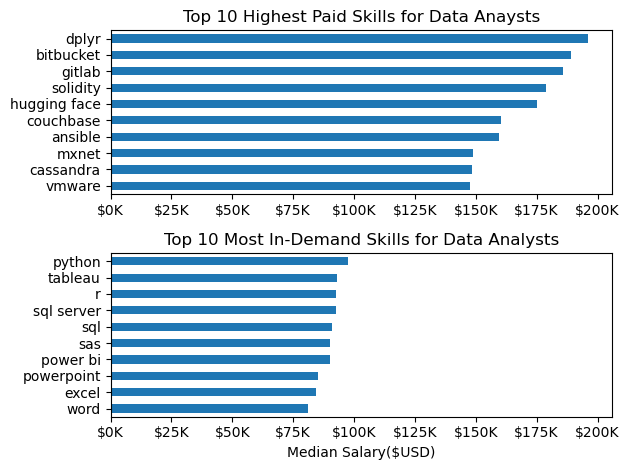

In [18]:
fig, ax = plt.subplots(2, 1)

df_DA_top_pay[::-1].plot(kind = 'barh', y ='median', ax=ax[0], legend = False)
ax[0].set_title('Top 10 Highest Paid Skills for Data Anaysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

df_DA_skills[::-1].plot(kind = 'barh', y ='median', ax=ax[1], legend = False)
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary($USD)')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

fig.tight_layout()